#### ♣♣♣ 다중분류를 위한 OvO ♣♣♣
- OvO(One-vs-One) 즉, 1:1 방식 2진 분류기 구성
- 2진 분류기 개수가 많아짐 
- 균형 데이터 분류 가능함!

[1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
### 모듈로딩 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np 

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ==> 1D으로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스 
    * 흑백 이미지

In [2]:
## 데이터 로딩
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위 
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [3]:
featureDF.head(1), targetSR.head(), targetSR.index

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int64,
 RangeIndex(start=0, stop=1797, step=1))

(8, 8)


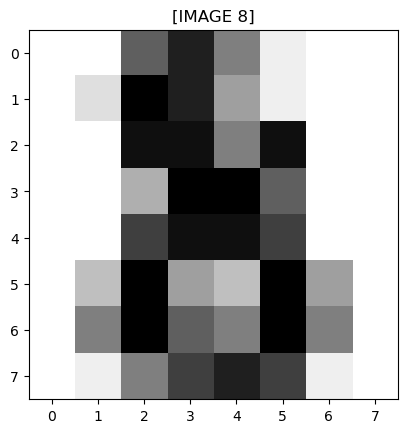

In [4]:
## 이미지 데이터 시각화 
import matplotlib.pyplot as plt 

# 1D ==> 2D 형태로 이미지 데이터
imgData=featureDF.iloc[-1].to_numpy().reshape(-1, 8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'[IMAGE {targetSR[1796]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [5]:
X_train, X_test, y_train , y_test =  train_test_split(featureDF, 
                                                      targetSR,
                                                      stratify=targetSR,
                                                      random_state=10)

In [6]:
featureDF.describe(), y_train[y_train.index[0]]

(       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 count 1797.00000 1797.00000 1797.00000 1797.00000 1797.00000 1797.00000   
 mean     0.00000    0.00119    0.02041    0.04642    0.04646    0.02267   
 std      0.00000    0.00356    0.01865    0.01666    0.01681    0.02222   
 min      0.00000    0.00000    0.00000    0.00000    0.00000    0.00000   
 25%      0.00000    0.00000    0.00392    0.03922    0.03922    0.00000   
 50%      0.00000    0.00000    0.01569    0.05098    0.05098    0.01569   
 75%      0.00000    0.00000    0.03529    0.05882    0.05882    0.04314   
 max      0.00000    0.03137    0.06275    0.06275    0.06275    0.06275   
 
        pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 count 1797.00000 1797.00000 1797.00000 1797.00000  ... 1797.00000 1797.00000   
 mean     0.00534    0.00051    0.00002    0.00782  ...    0.01461    0.00081   
 std      0.01304    0.00407    0.00037    0.01253  ...    0.01929    0

- OvO(One vs One) 방식 2진 분류기 생성<hr>

In [7]:
# 모듈로딩
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

## 45개의 2진 분류기 모델 생성됨
ovo_clf = OneVsOneClassifier(KNeighborsClassifier())
ovo_clf.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,n_jobs,None
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovo_clf.estimators_)}개' )
print(f'ovr_clf.classes_    : {ovo_clf.classes_}' )
print(f'ovr_clf.classes_    : {ovo_clf.n_classes_ }' )

ovr_clf.estimators_ : 45개
ovr_clf.classes_    : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_    : 10
